# Imports

In [86]:
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Notebook Parameters

In [87]:
pd.set_option('display.max_columns',600)

# Reading in the Data from Instagram Profiles (csv, and json file)

In [ ]:
instagram_profiles_sample = pd.read_csv('../data/instagram_dataset_sample/Instagram Profiles - Github Hashtag - instagram_profile.csv')

### Features
- account
- biography
- business_address_json

In [ ]:
instagram_profiles_sample.head()

In [ ]:
instagram_profiles_sample['changelog'][3]

# Example data: Replace with your actual data
follower_data = {
    'user1': {'follower1': {'likes': 10, 'comments': 5}, 'follower2': {'likes': 15, 'comments': 8}},
    'user2': {'follower3': {'likes': 20, 'comments': 12}},
    # ... more user-follower engagement data
}

In [ ]:
instagram_profiles_sample['posts'][0]

In [ ]:
data_sup = {
    'user_id': ['user1', 'user2', 'user3', 'user4', 'user5'],
    'following': ['user2,user3,user4', 'user1,user5', 'user1,user5', 'user2,user3', 'user1,user4']
}

df = pd.DataFrame(data_sup)

# If needed, you can split the 'following' column into a list of users
df['following'] = df['following'].apply(lambda x: x.split(','))

print(df)

In [ ]:
instagram_profiles_sample['posts'][4]

In [ ]:
instagram_profiles_sample.columns

In [88]:
json_file_path = '../data/instagram_dataset_sample/instagram_profiles_Github Hashtag_dataset.json'

# Read the JSON file
with open(json_file_path, 'r') as file:
    # Load JSON data
    json_data = json.load(file)

In [89]:
json_str = json.dumps(json_data, ensure_ascii=False)

In [90]:
type(json_str)

str

In [91]:
# Parse JSON data
data = json.loads(json_str)

# Initialize follower_data dictionary
follower_data = {}

# Iterate through user data
for user in data:
    user_name = user['account']
    follower_data[user_name] = {}

    # Iterate through user's posts
    for post in user['posts']:
        post_id = post['id']
        likes = post['likes']
        comments = post['comments']

        # Create a follower entry for the post
        follower_data[user_name][post_id] = {'likes': likes, 'comments': comments}

In [94]:
follower_data 

{'yazilim.exe': {'2521884486258590341': {'likes': 86, 'comments': 0},
  '2519969086646769683': {'likes': 25, 'comments': 0},
  '2516814455866704578': {'likes': 35, 'comments': 0},
  '2516151595008948237': {'likes': 20, 'comments': 0},
  '2515312567527212853': {'likes': 35, 'comments': 0},
  '2514832726356572893': {'likes': 27, 'comments': 0},
  '2514575726863892307': {'likes': 21, 'comments': 0},
  '2513882369867051971': {'likes': 43, 'comments': 1},
  '2513501046765228887': {'likes': 43, 'comments': 0},
  '2447963763015386424': {'likes': 58, 'comments': 1},
  '2447870158891605338': {'likes': 66, 'comments': 0},
  '2447420841290428281': {'likes': 48, 'comments': 0}},
 'yazilimci.genclik': {'2535805819262655725': {'likes': 268, 'comments': 4},
  '2534356508211319476': {'likes': 203, 'comments': 6},
  '2532906950650258921': {'likes': 149, 'comments': 1},
  '2531457382167459448': {'likes': 184, 'comments': 4},
  '2530007806026868200': {'likes': 157, 'comments': 1},
  '2528558072805480736'

In [99]:
def network_analysis_plot(n=10):
    """
    Visualize a network graph based on follower data.

    Parameters:
    - n (int): Number of relationships to include in the analysis and visualization.

    Returns:
    None
    """
    # Ensure n is a positive integer
    if not isinstance(n, int) or n <= 0:
        raise ValueError("The parameter 'n' should be a positive integer greater than 0.")

    # Convert follower_data to Pandas DataFrame
    follower_data_list = [
        (follower, followed, data['likes'], data['comments']) 
        for follower, followed_data in follower_data.items() 
        for followed, data in followed_data.items()
    ]
    df = pd.DataFrame(follower_data_list, columns=['follower', 'followed', 'likes', 'comments'])

    # Take the first n relationships
    df = df.head(n)

    # Create a directed graph (DiGraph) as we assume following/follower relationships
    G = nx.DiGraph()

    # Add nodes (users) to the graph
    G.add_nodes_from(df['follower'].unique())
    G.add_nodes_from(df['followed'].unique())

    # Add edges (relationships) to the graph
    for _, row in df.iterrows():
        G.add_edge(row['follower'], row['followed'], likes=row['likes'], comments=row['comments'])

    # Visualize the graph
    pos = nx.spring_layout(G)  # You can choose other layouts based on your preference
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=20, node_color='skyblue', edge_color='gray', linewidths=0.5, font_size=8)
    plt.title('Social Network Diagram for {} Relationships'.format(n))
    plt.show()

In [100]:
n_list = [10,20,30,40,50,60,70,80,90,100]

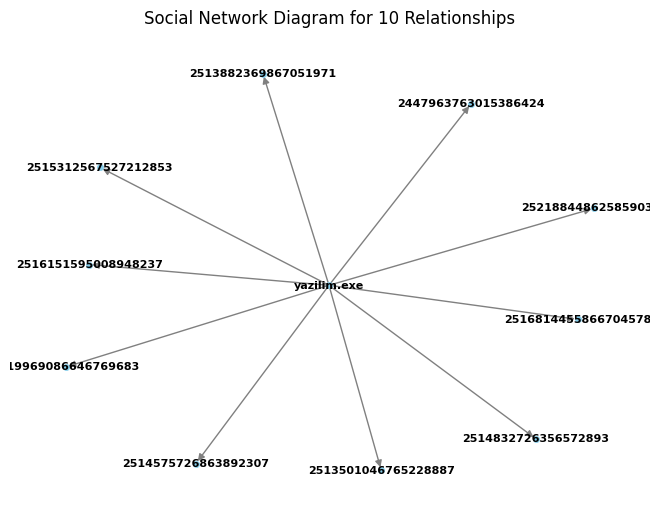

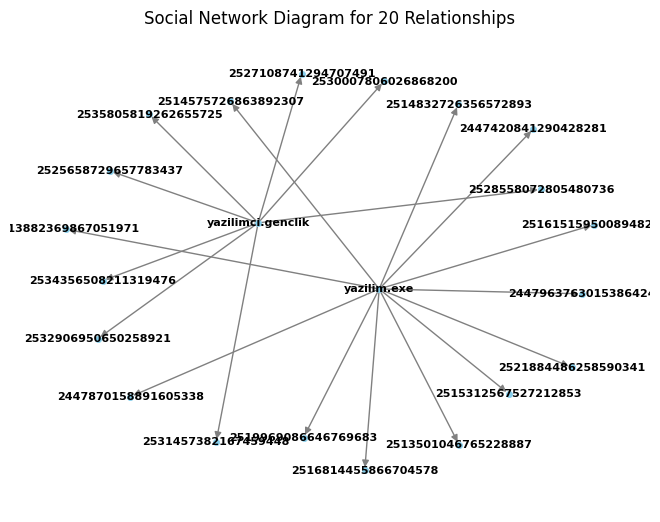

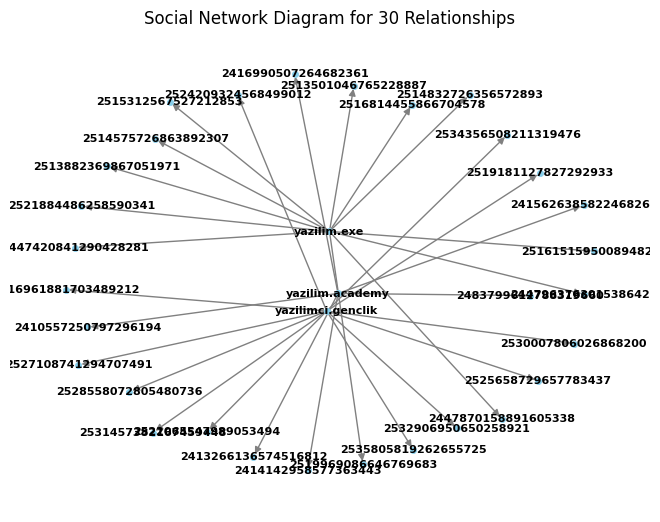

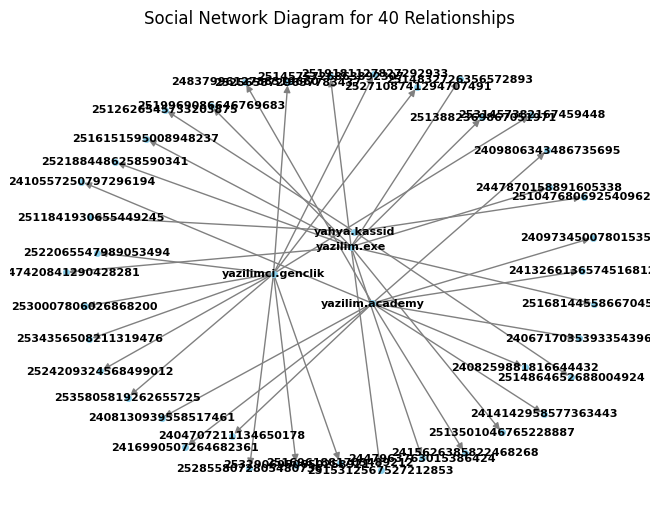

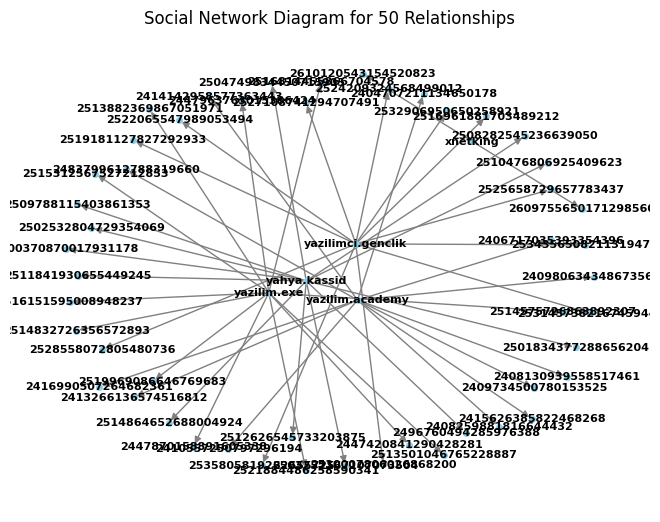

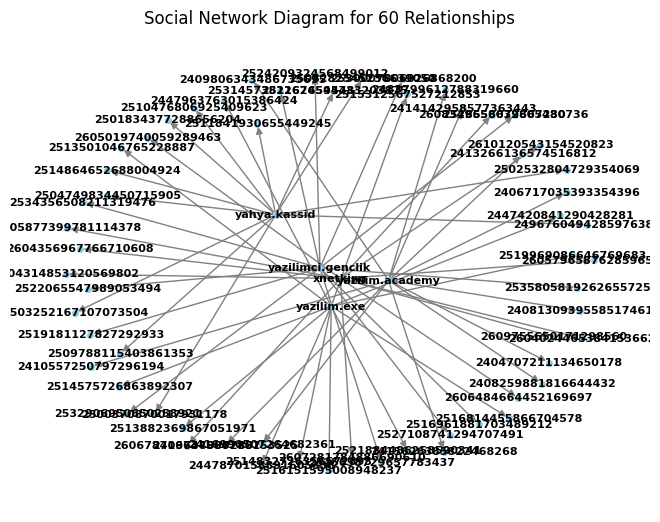

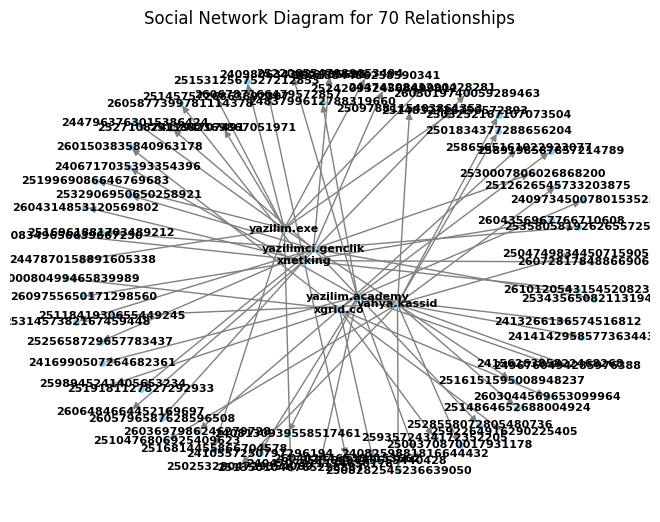

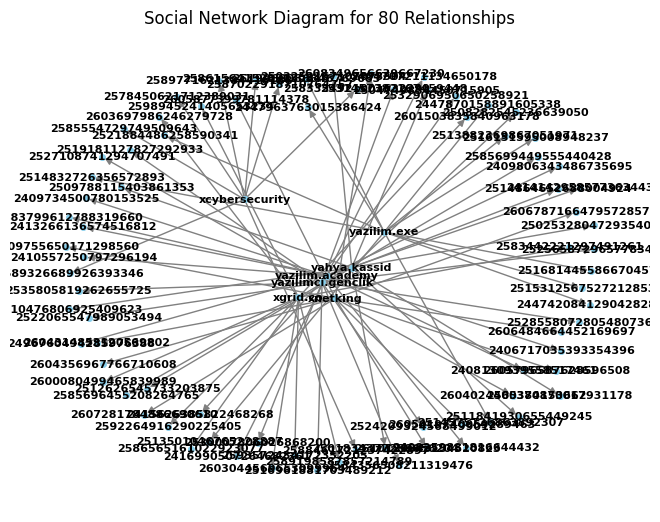

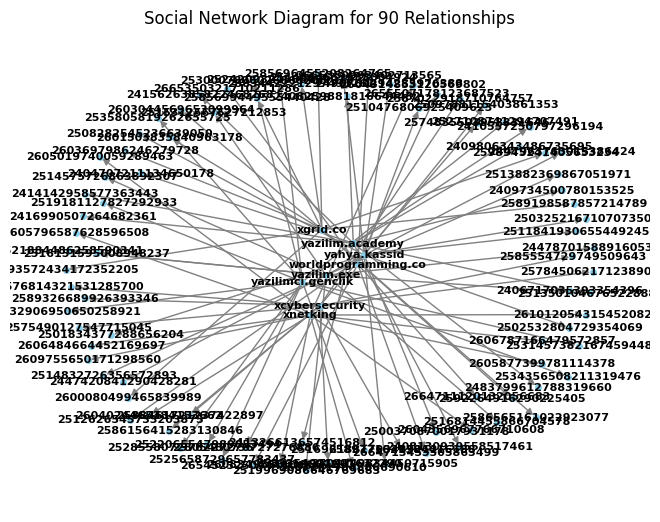

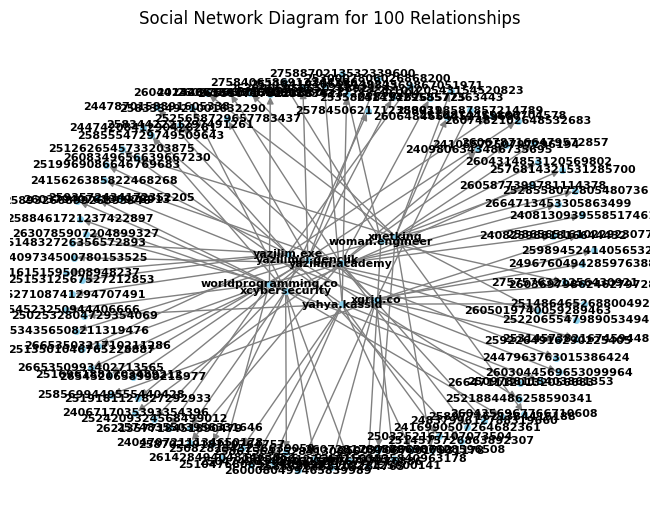

In [101]:
for n in n_list:
    network_analysis_plot(n)